In [ ]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


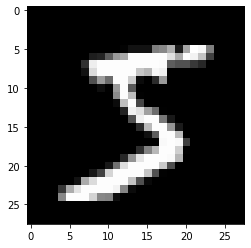

In [ ]:
plt.imshow(X_train[0],cmap='gray')

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
X_train = X_train.reshape((60000,28,28,1))
X_train = X_train.astype(dtype = 'float32')

X_test = X_test.reshape((10000,28,28,1))
X_test = X_test.astype(dtype = 'float32')

y_train = y_train.reshape((60000,1))
y_test = y_test.reshape((10000,1))

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D,Dropout,Flatten,Dense

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='Nadam',loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x = X_train, y= y_train, batch_size=256, epochs=5,validation_split=0.1,shuffle=True)

Epoch 1/5
211/211 [==============================] - 43s 201ms/step - loss: 2.4476 - accuracy: 0.8693 - val_loss: 0.1360 - val_accuracy: 0.9658
Epoch 2/5
211/211 [==============================] - 42s 200ms/step - loss: 0.1537 - accuracy: 0.9599 - val_loss: 0.0928 - val_accuracy: 0.9753
Epoch 3/5
211/211 [==============================] - 42s 199ms/step - loss: 0.0966 - accuracy: 0.9726 - val_loss: 0.0857 - val_accuracy: 0.9792
Epoch 4/5
211/211 [==============================] - 42s 199ms/step - loss: 0.0699 - accuracy: 0.9794 - val_loss: 0.0849 - val_accuracy: 0.9807
Epoch 5/5
211/211 [==============================] - 42s 199ms/step - loss: 0.0535 - accuracy: 0.9838 - val_loss: 0.0708 - val_accuracy: 0.9842


In [ ]:
print(model.evaluate(X_test,y_test))

313/313 [==============================] - 3s 9ms/step - loss: 0.0769 - accuracy: 0.9808
[0.07692112773656845, 0.9807999730110168]


In [ ]:
history.history

{'accuracy': [0.8693147897720337,
  0.959851861000061,
  0.9725925922393799,
  0.9793888926506042,
  0.9838333129882812],
 'loss': [2.44761323928833,
  0.15371821820735931,
  0.09664487838745117,
  0.06991150975227356,
  0.053450629115104675],
 'val_accuracy': [0.965833306312561,
  0.9753333330154419,
  0.9791666865348816,
  0.9806666374206543,
  0.98416668176651],
 'val_loss': [0.13598565757274628,
  0.09283392131328583,
  0.08573290705680847,
  0.08489575982093811,
  0.07077431678771973]}

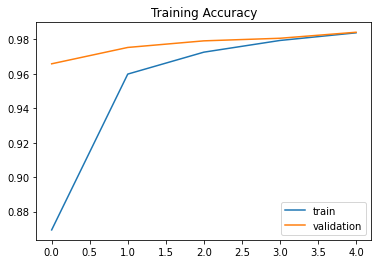

In [ ]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.title("Training Accuracy")
plt.legend()
plt.show()

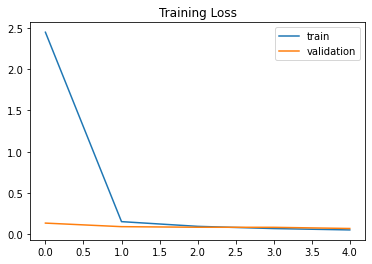

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.title("Training Loss")
plt.legend()
plt.show()

In [ ]:
pred_classes = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
(_, _), (x_test_2, y_test_2) = mnist.load_data()

In [ ]:
import os

if not os.path.isdir("mislabeled_testdata"):
  os.mkdir("mislabeled_testdata")

In [ ]:
for i in range(len(pred_classes)):
  if pred_classes[i] != y_test_2[i]:
    plt.imshow(x_test_2[i])
    plt.title(str(pred_classes[i]))
    plt.savefig(f"mislabeled_testdata/{i}_{y_test_2[i]}_{pred_classes[i]}.png")
    plt.close()
    # plt.show()